# **پیش** **گزارش**

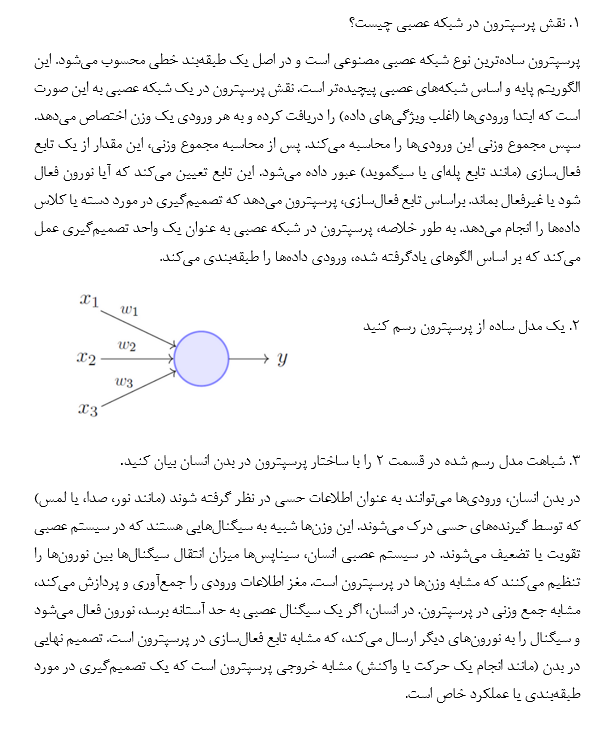

# **آزمایش(پیاده سازی پرسپترون)**

In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01):
        self.weights = np.random.rand(input_size)
        self.threshold = np.random.rand()
        self.learning_rate = learning_rate

    def activation_function(self, net_input):
        return 1 if net_input >= self.threshold else 0

    def predict(self, inputs):
        net_input = np.dot(inputs, self.weights)
        return self.activation_function(net_input)

    def train(self, training_data, labels, epochs):

        for epoch in range(epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.threshold -= self.learning_rate * error


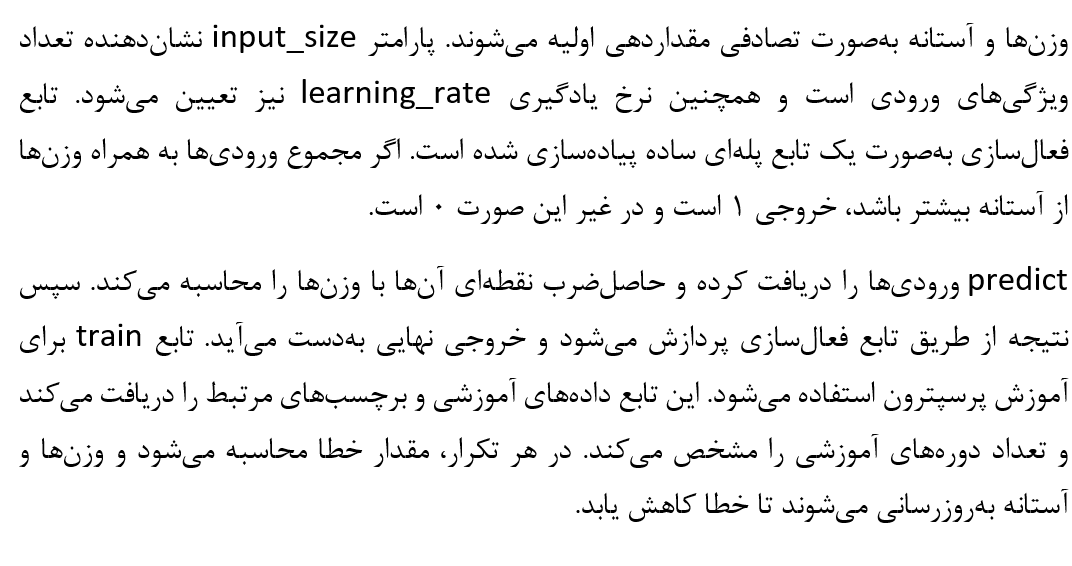

# **استفاده از دیتاست سرطان**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [ ]:
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

perceptron = Perceptron(input_size=X_train_scaled.shape[1], learning_rate=0.01)

perceptron.train(X_train_scaled, y_train, epochs=100)

y_pred = [perceptron.predict(x) for x in X_test_scaled]

accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل پرسپترون: {accuracy * 100:.2f}%")

دقت مدل پرسپترون: 96.49%


# **بهبود عملکرد مدل**

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

learning_rates = [0.001, 0.01, 0.1, 0.5]
test_sizes = [0.1, 0.2, 0.3]

best_accuracy = 0
best_learning_rate = 0
best_test_size = 0

for lr in learning_rates:
    for ts in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        perceptron = Perceptron(input_size=X_train_scaled.shape[1], learning_rate=lr)

        perceptron.train(X_train_scaled, y_train, epochs=100)

        y_pred = [perceptron.predict(x) for x in X_test_scaled]

        accuracy = accuracy_score(y_test, y_pred)
        print(f"learning_rate: {lr},test size: {ts}, Accuracy: {accuracy * 100:.2f}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_learning_rate = lr
            best_test_size = ts

print(f"\n The best accueacy: {best_accuracy * 100:.2f}٪ with learning rate: {best_learning_rate} and test size: {best_test_size}")

learning_rate: 0.001,test size: 0.1, Accuracy: 94.74
learning_rate: 0.001,test size: 0.2, Accuracy: 95.61
learning_rate: 0.001,test size: 0.3, Accuracy: 95.91
learning_rate: 0.01,test size: 0.1, Accuracy: 91.23
learning_rate: 0.01,test size: 0.2, Accuracy: 94.74
learning_rate: 0.01,test size: 0.3, Accuracy: 97.66
learning_rate: 0.1,test size: 0.1, Accuracy: 92.98
learning_rate: 0.1,test size: 0.2, Accuracy: 95.61
learning_rate: 0.1,test size: 0.3, Accuracy: 96.49
learning_rate: 0.5,test size: 0.1, Accuracy: 92.98
learning_rate: 0.5,test size: 0.2, Accuracy: 97.37
learning_rate: 0.5,test size: 0.3, Accuracy: 94.74

 The best accueacy: 97.66٪ with learning rate: 0.01 and test size: 0.3


# **تمرین 1 (اضافه کردن بایاس)**

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.01):
        # اضافه کردن یک وزن اضافی برای بایاس
        self.weights = np.random.rand(input_size + 1)
        self.learning_rate = learning_rate

    def activation_function(self, net_input):
        return 1 if net_input >= 0 else 0

    def predict(self, inputs):
        inputs_with_bias = np.append(inputs, 1)
        net_input = np.dot(inputs_with_bias, self.weights)
        return self.activation_function(net_input)

    def train(self, training_data, labels, epochs):
        for epoch in range(epochs):
            for inputs, label in zip(training_data, labels):
                inputs_with_bias = np.append(inputs, 1)
                prediction = self.predict(inputs)
                error = label - prediction  #خطا
                self.weights += self.learning_rate * error * inputs_with_bias  # وزنا با بایاس)

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

perceptron = Perceptron(input_size=X_train_scaled.shape[1], learning_rate=0.01)

perceptron.train(X_train_scaled, y_train, epochs=100)

y_pred = [perceptron.predict(x) for x in X_test_scaled]

accuracy = accuracy_score(y_test, y_pred)
print(f"دقت مدل پرسپترون با بایاس: {accuracy * 100:.2f}%")

دقت مدل پرسپترون با بایاس: 97.37%


# **تمرین 2**

 می خواهیم کلاس داده هایی به شکل زیر را توسط پرسپترون پیش بینی کنیم

نقاط صورتی رنگ
متعلق به کلاس صفر و نقاط دیگر متعلق به کلاس ۱ در نظر گرفته می شود

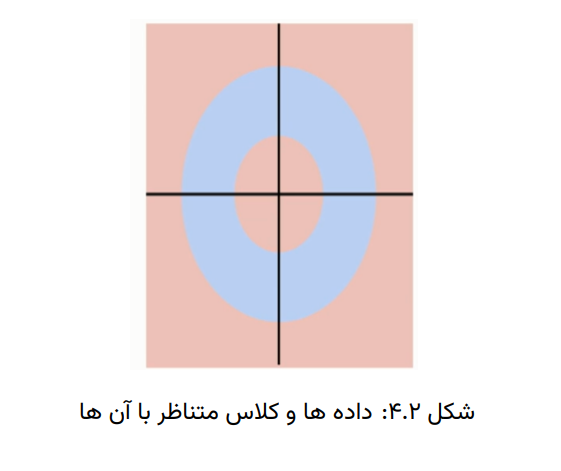

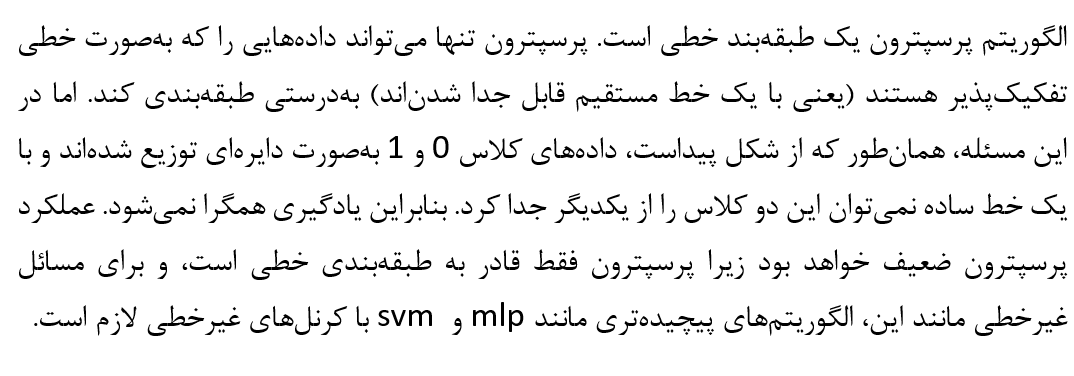

# **(**xor,or,and**)تمرین  4**

✅AND
✅OR
❌XOR

In [ ]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.rand(input_size + 1)
        self.learning_rate = learning_rate

    def activation_function(self, net_input):
        return 1 if net_input >= 0 else 0

    def predict(self, inputs):
        inputs_with_bias = np.append(inputs, 1)
        net_input = np.dot(inputs_with_bias, self.weights)
        return self.activation_function(net_input)

    def train(self, training_data, labels, epochs):
        for epoch in range(epochs):
            for inputs, label in zip(training_data, labels):
                inputs_with_bias = np.append(inputs, 1)
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs_with_bias

and_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
and_labels = np.array([0, 0, 0, 1])

or_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
or_labels = np.array([0, 1, 1, 1])

xor_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
xor_labels = np.array([0, 1, 1, 0])

print("Training AND Perceptron")
and_perceptron = Perceptron(input_size=2)
and_perceptron.train(and_data, and_labels, epochs=10)
for x in and_data:
    print(f"{x} -> {and_perceptron.predict(x)}")

print("\nTraining OR Perceptron")
or_perceptron = Perceptron(input_size=2)
or_perceptron.train(or_data, or_labels, epochs=10)
for x in or_data:
    print(f"{x} -> {or_perceptron.predict(x)}")

print("\nTraining XOR Perceptron")
xor_perceptron = Perceptron(input_size=2)
xor_perceptron.train(xor_data, xor_labels, epochs=10)
for x in xor_data:
    print(f"{x} -> {xor_perceptron.predict(x)}")


Training AND Perceptron
[0 0] -> 0
[0 1] -> 0
[1 0] -> 0
[1 1] -> 1

Training OR Perceptron
[0 0] -> 0
[0 1] -> 1
[1 0] -> 1
[1 1] -> 1

Training XOR Perceptron
[0 0] -> 1
[0 1] -> 1
[1 0] -> 0
[1 1] -> 0


# **تمرین 5**

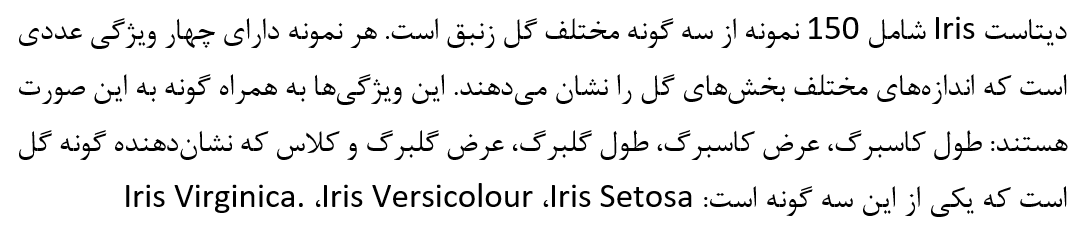

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01):
        self.weights = np.random.rand(input_size + 1)  # اضافه کردن بایاس به وزن‌ها
        self.learning_rate = learning_rate

    def activation_function(self, net_input):
        return 1 if net_input >= 0 else 0

    def predict(self, inputs):
        inputs_with_bias = np.append(inputs, 1)
        net_input = np.dot(inputs_with_bias, self.weights)
        return self.activation_function(net_input)

    def train(self, training_data, labels, epochs):
        for epoch in range(epochs):
            for inputs, label in zip(training_data, labels):
                inputs_with_bias = np.append(inputs, 1)
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs_with_bias

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

classifiers = []
for class_label in np.unique(y):
    print(f"Training Perceptron for class {class_label}")

    binary_labels = np.where(y_train == class_label, 1, 0)

    perceptron = Perceptron(input_size=X_train_scaled.shape[1], learning_rate=0.01)

    perceptron.train(X_train_scaled, binary_labels, epochs=100)

    classifiers.append(perceptron)

predictions = []
for x in X_test_scaled:
    class_scores = [classifier.predict(x) for classifier in classifiers]
    predictions.append(np.argmax(class_scores))

accuracy = accuracy_score(y_test, predictions)
print(f"دقت مدل پرسپترون برای کلسیفیکیشن : {accuracy * 100:.2f}%")
##از تکنیک "One-vs-All" استفاده کردیم :)

Training Perceptron for class 0
Training Perceptron for class 1
Training Perceptron for class 2
دقت مدل پرسپترون برای کلسیفیکیشن : 80.00%


## **تمرین 6**

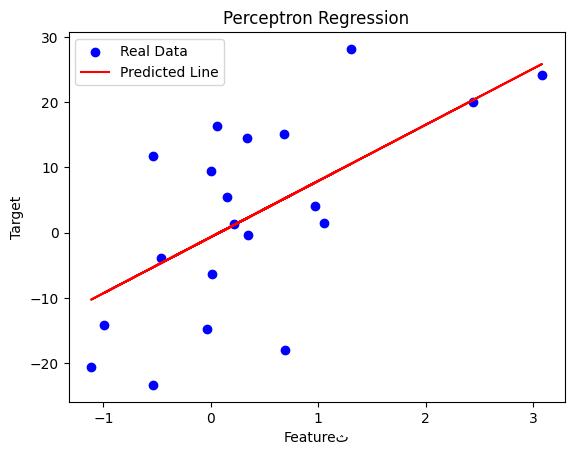

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_regression(n_samples=100, n_features=1, noise=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

class PerceptronRegression:
    def __init__(self, input_size, learning_rate=0.01):
        self.weights = np.random.rand(input_size + 1)
        self.learning_rate = learning_rate

    def predict(self, inputs):
        inputs_with_bias = np.append(inputs, 1)
        return np.dot(inputs_with_bias, self.weights)

    def train(self, training_data, labels, epochs):
        for epoch in range(epochs):
            for inputs, label in zip(training_data, labels):
                inputs_with_bias = np.append(inputs, 1)
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs_with_bias

perceptron = PerceptronRegression(input_size=X_train_scaled.shape[1], learning_rate=0.01)
perceptron.train(X_train_scaled, y_train, epochs=1000)

y_pred = [perceptron.predict(x) for x in X_test_scaled]

plt.scatter(X_test_scaled, y_test, color="blue", label="Real Data")
plt.plot(X_test_scaled, y_pred, color="red", label="Predicted Line")
plt.xlabel("Featureث")
plt.ylabel("Target")
plt.title("Perceptron Regression")
plt.legend()
plt.show()
### می توان از سایر توابع هم استفاده کرد تا لایه ی آخر را تغییر دهیم و عملکرد مدل را بهتر کنیم